<!--NAVIGATION-->
< [Conteúdo](Index.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/1001.Regressao-a-Media.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Regressão à média

<strong>Regressão à média</strong> (<strong><em>regression to the mean</em></strong>) <mark>é um fenômeno estatístico</mark> que ocorre sempre que:
- você trabalha com uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong> extraída da <strong><font color=orange>população</font></strong>
- e duas variáveis <strong>imperfeitamente correlacionadas</strong> (correlação diferente de $1$ ou diferente de $-1$) são medidas, por exemplo, duas medições consecutivas da pressão arterial.

Quanto menos correlacionadas as duas variáveis, maior o efeito da regressão para a média. Além disso, quanto mais extremo for o valor da média da <strong><font color=gray>amostra</font></strong> não aleatória (quando comparada com a média da <strong><font color=orange>população</font></strong>), mais espaço haverá para regredir à média.

Mas para entendermos com maior clareza as frases anteriores, e o que é <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>), vamos recorrer a um pouco de história e a um exemplo.

## Francis Galton e o fenômeno de <em>regression towards mediocrity</em>

A primeira pessoa que descreveu e explicou o fenômeno de <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>) foi <strong><em>Sir Francis Galton</em></strong> em 1886. <em>Galton</em> foi pioneiro na aplicação de métodos estatísticos para realização de medições em muitos ramos da ciência e, ao estudar dados sobre os tamanhos relativos entre pais e filhos em várias espécies de plantas e animais, ele observou o seguinte fenômeno:
- Um pai cuja altura é maior do que a média da sua geração tende a produzir um filho cuja altura também será maior do que a média da sua geração, no entanto, é provável que a altura do filho não se destaque tanto quanto a do pai em termos relativos dentro de suas próprias gerações.
- Em outras palavras, se a altura do pai está a $x$ desvios padrão da média dentro da sua própria geração, deve-se esperar que a altura do filho esteja a $rx$ desvios padrão da média dentro do conjunto de filhos desses pais, onde $r$ é um número menor do que $1$ em magnitude.

<em>Galton</em> denominou esse fenômeno de <em>regression towards mediocrity</em>, conhecido altualmente como <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>). Para um observador ingênuo, isso pode sugerir que as gerações posteriores exibirão menos variabilidade (literalmente mais mediocridade) do que as anteriores, mas esse não é o caso. Trata-se de um fenômeno puramente estatístico, já iremos entender o porquê.

## Uma explicação intuitiva

A explicação intuitiva para o efeito da <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>) é pensar em termos de <strong>viés de seleção</strong>. Em geral, o desempenho de um jogador durante um determinado período de tempo pode ser atribuído a uma combinação de <font color=magenta>habilidade</font> com <font color=magenta>sorte</font>. Suponha que selecionamos uma amostra de atletas profissionais cujo desempenho foi muito melhor do que a média (ou estudantes cujas notas foram muito melhores do que a média) na primeira metade do ano. O fato de terem se saído tão bem no primeiro semestre torna provável que suas <font color=magenta>habilidades</font> e <font color=magenta>sorte</font> tenham sido melhores do que a média durante esse período. No segundo semestre, podemos esperar que sejam igualmente <font color=magenta>habilidosos</font>, mas não devemos esperar que tenham a mesma <font color=magenta>sorte</font>. Portanto, devemos esperar que no segundo semestre <mark>o desempenho deles esteja mais próximo da média</mark>. O mesmo vale para os jogadores com desempenho muito pior do que a média na primeira metade do ano. O fato de terem se saído tão mal no primeiro semestre torna provável que suas <font color=magenta>habilidades</font> e <font color=magenta>sorte</font> tenham sido piores do que a média durante esse período. No segundo semestre, podemos esperar o mesmo nível de <font color=magenta>habilidade</font> do primeiro semestre, mas não devemos esperar que tenham a mesma <font color=magenta>sorte</font> (ou neste caso, o mesmo <font color=magenta>azar</font>). Portanto, também devemos esperar que no segundo semestre <mark>o desempenho deles esteja mais próximo da média</mark>. Na prática, o desempenho real dos jogadores deve ter uma variação igualmente grande tanto no primeiro semestre quanto no segundo, pois esta variação resulta meramente de uma redistribuição da <font color=magenta>sorte</font> (que é aleatória e independente) entre os jogadores (que continuam possuindo a mesma distribuição de <font color=magenta>habilidades</font> de antes).

Outra maneira de pensar no efeito da <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>) é o seguinte: tipicamente, tudo o que tentamos prever consiste em uma componente previsível (o <font color=magenta>sinal</font>) e uma componente imprevisível (o <font color=magenta>ruído</font>) que é estatisticamente independente. O melhor que podemos esperar é prever (apenas) a parte da variabilidade que é devida ao <font color=magenta>sinal</font>. Portanto, as nossas previsões tenderão a exibir menos variabilidade do que os valores reais observados, o que implica em uma <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>).

## Um exemplo numérico

Primeiramente, vamos criar $3$ variáveis aleatórias:
- $\text{rv_skill} \sim N \left(\mu=50, \sigma=10 \right)$: uma para representar a <strong>habilidade dos jogadores</strong> (`rv_skill`) tanto no primeiro quanto no segundo semestre (estamos assumindo que a habilidade dos jogadores não sofrerá grandes ou quaisquer modificações entre um semestre e outro). Representaremos esta variável aleatória através de uma distribuição normal com média $\mu=50$ e desvio padrão $\sigma=10$.
- $\text{rv_luck_period1} \sim N \left(\mu=0, \sigma=5 \right)$: uma para representar a <strong>sorte dos jogadores no primeiro semestre</strong> (`rv_luck_period1`), através de uma distribuição normal com média $\mu=0$ e desvio padrão igual a $\sigma=5$.
- $\text{rv_luck_period2} \sim N \left(\mu=0, \sigma=5 \right)$: uma para representar a <strong>sorte dos jogadores no segundo semestre</strong> (`rv_luck_period2`), através de uma distribuição normal com média $\mu=0$ e desvio padrão igual a $\sigma=5$.

Vamos supor que a nossa <strong><font color=orange>população</font></strong> seja composta por $500$ jogadores.

In [1]:
from scipy import stats as st

rv_skill = st.norm(loc=50.0, scale=10.0)
rv_luck_period1 = st.norm(loc=0.0, scale=5.0)
rv_luck_period2 = st.norm(loc=0.0, scale=5.0)

pop_size = 500

pop_skill = rv_skill.rvs(size=pop_size)
pop_luck_period1 = rv_luck_period1.rvs(size=pop_size)
pop_luck_period2 = rv_luck_period2.rvs(size=pop_size)

A simulação dos experimentos que representam a medição das habilidades da nossa <strong><font color=orange>população</font></strong> de jogadores no primeiro (`pop_measure_period1`) e no segundo (`pop_measure_period2`) semestre é realizada através do código abaixo.

Vale lembrar que as habilidades são medidas através das informações que são observadas no mundo real, portanto, serão compostas de uma componente de <font color=magenta>habilidade real</font> (o <font color=magenta>sinal</font>) e uma componente de <font color=magenta>sorte</font> (o <font color=magenta>ruído</font>).

In [2]:
pop_measure_period1 = pop_skill + pop_luck_period1
pop_measure_period2 = pop_skill + pop_luck_period2

Vamos verificar algumas estatísticas da nossa <strong><font color=orange>população</font></strong> de jogadores.

In [3]:
import pandas as pd

df = pd.DataFrame({
    'skill': pop_skill,
    'luck1': pop_luck_period1, 'luck2': pop_luck_period2,
    'skill_measure1': pop_measure_period1, 'skill_measure2': pop_measure_period2
})
df.describe()

,skill,luck1,luck2,skill_measure1,skill_measure2
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,50.417666,-0.169433,-0.149284,50.248234,50.268382
std,9.863173,5.098281,5.203072,11.187947,10.851473
min,20.306639,-18.994974,-14.482600,17.791676,20.639844
25%,43.970388,-3.683680,-3.913889,43.206588,42.658300
50%,50.334745,-0.112249,-0.385512,50.349640,49.538598
75%,56.759845,3.239679,3.223919,57.422760,57.246697
max,79.273418,17.299840,19.494446,84.196497,88.173744


O esperado é que a média da variável que representa a habilidade real dos jogadores (<em>skill</em>) seja próxima de $50$ e as médias das componentes que representam a sorte (no primeiro e segundo semestres, <em>luck1</em> e <em>luck2</em>) sejam próximas de $0$.

Vamos verificar as distribuições das duas (primeiro e segundo semestre) medições de habilidades (<em>skill_measure1</em> e <em>skill_measure2</em>) e checar se o formato das mesmas parece uma normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BF663F108>]],
      dtype=object)

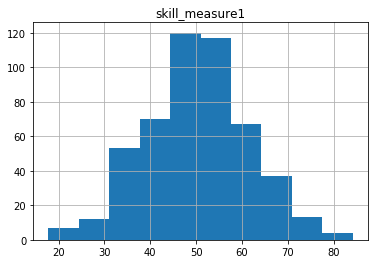

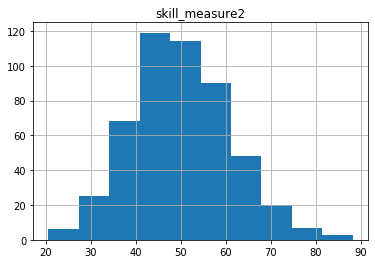

In [4]:
df.hist(column='skill_measure1')
df.hist(column='skill_measure2')

Os histogramas devem se assemelhar à curva normal. Além disto, as variáveis que representam as duas medições são correlacionadas, uma vez que possuem a mesma componente da habilidade real dos jogadores.

In [5]:
r = st.pearsonr(pop_measure_period1, pop_measure_period2)

print("Correlation beetwen skill_measure1 and skill_measure2 = {0}".format(r[0]))
print("p-value of correlation = {0}".format(r[1]))

Correlation beetwen skill_measure1 and skill_measure2 = 0.7760513564050293
p-value of correlation = 9.20513596187802e-102


Não esperamos que sejam perfeitamente correlacionadas, uma vez que a componente de sorte é aleatória e independente entre os semestres. Abaixo o gráfico que representa a distribuição bivariada das medições.

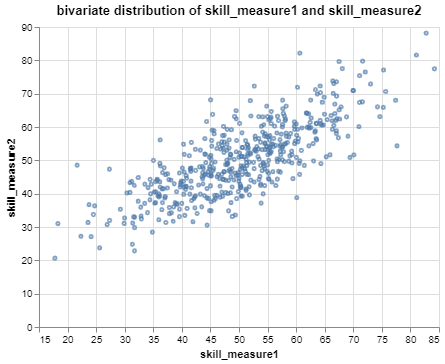

In [6]:
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session

# scatter plot of dataset
df_plot = alt.Chart(df).mark_point().encode(
    alt.X('skill_measure1:Q', scale=alt.Scale(zero=False)),
    y='skill_measure2:Q',
    size=alt.value(10)
).properties(title="bivariate distribution of skill_measure1 and skill_measure2")

df_plot

Como já mencionado aqui,

<blockquote>
<strong>Regressão à média</strong> (<strong><em>regression to the mean</em></strong>) é um fenômeno estatístico que ocorre sempre que você trabalha <mark>com uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong> extraída da <strong><font color=orange>população</font></strong></mark> e duas variáveis <mark><strong>imperfeitamente correlacionadas</strong></mark> (correlação diferente de $1$ ou diferente de $-1$) são medidas, por exemplo, duas medições consecutivas da pressão arterial. Quanto menos correlacionadas as duas variáveis, maior o efeito da regressão para a média. Além disso, <mark>quanto mais extremo for o valor da média da <strong><font color=gray>amostra</font></strong> não aleatória (quando comparada com a média da <strong><font color=orange>população</font></strong>), mais espaço haverá para regredir à média</mark>.
</blockquote>

ou seja, <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>) tende a ocorrer sempre que selecionamos um <strong>grupo extremo</strong> da <strong><font color=orange>população</font></strong>.

Então suponha que a nossa <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong> represente o grupo de jogadores cuja habilidade tenha sido menor do que $50$ no semestre 1, ou seja, menor do que a média da <strong><font color=orange>população</font></strong>.

In [7]:
# função para filtrar as linhas do data frame
def filter_df(filter_param, df):
    filtered_df = df[filter_param]
    filtered_df = filtered_df.rename(columns = {
        'skill':'sample_skill', 
        'luck1':'sample_luck1', 'luck2':'sample_luck2', 
        'skill_measure1':'sample_skill_measure1', 'skill_measure2':'sample_skill_measure2'})
    return filtered_df

In [8]:
is_skill_measure1_below_50 = df['skill_measure1'] < 50
df_skill_measure1_below_50 = filter_df(is_skill_measure1_below_50, df)
df_skill_measure1_below_50.head()

,sample_skill,sample_luck1,sample_luck2,sample_skill_measure1,sample_skill_measure2
1,47.127489,1.299919,3.671169,48.427408,50.798659
2,47.681997,-4.035868,-1.405157,43.646129,46.276841
7,40.961612,-8.160972,-5.013607,32.800640,35.948005
9,48.357124,-3.222692,2.061614,45.134433,50.418738
10,46.673540,2.636430,-0.517871,49.309970,46.155669


O que fizemos nos passos anteriores foi gerar uma <strong><font color=gray>amostra</font></strong> (a partir da nossa <strong><font color=orange>população</font></strong>) que compreende apenas jogadores tais que $\text{skill_measure1} < 50$. Trata-se de uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong>.

Então, se para apenas esta <strong><font color=gray>amostra</font></strong> de jogadores compararmos o desempenho deles entre o primeiro e segundo semestres (<em>sample_skill_measure1</em> e <em>sample_skill_measure2</em>), teremos:

In [9]:
df_skill_measure1_below_50[['sample_skill_measure1', 'sample_skill_measure2']].describe()

,sample_skill_measure1,sample_skill_measure2
count,242.000000,242.000000
mean,41.098062,43.597161
std,6.809014,8.221230
min,17.791676,20.639844
25%,36.575304,38.212161
50%,42.383570,43.725251
75%,46.699970,48.123878
max,49.985832,68.147632


Ao analisar os dados anteriores, a primeira impressão é a de que o desempenho dos jogadores melhorou um pouco do primeiro semestre para o segundo semestre (a média da medição do segundo semestre é um pouco maior do que a do primeiro). Isto significa que os jogadores ficaram mais habilidosos no segundo semestre? Que essa melhoria é apenas uma maturação normal em virtude dos treinos? Provavelmente, não! O que você está testemunhando aqui é o efeito da <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>).

Foi selecionado um grupo de jogadores que apresentaram um baixo desempenho na medição do primeiro semestre ($\text{skill_measure1} < 50$). Então, para qualquer outra medição que estiver imperfeitamente correlacionada com a medição do primeiro semestre, este grupo de jogadores parecerá ter um desempenho melhor, simplesmente por causa da <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>). Note que a habilidade real (<em>sample_skill</em>) destes jogadores permanece a mesma tanto no primeiro quanto no segundo semestre, já a componente da sorte, não é a mesma entre o primeiro e segundo semestres (<em>sample_luck1</em> e <em>sample_luck2</em>).

Veja as distribuições das medições no primeiro e segundo semestres do grupo de jogadores pertencentes à <strong><font color=gray>amostra</font></strong>.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BF89D1808>]],
      dtype=object)

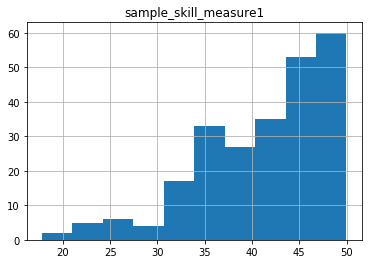

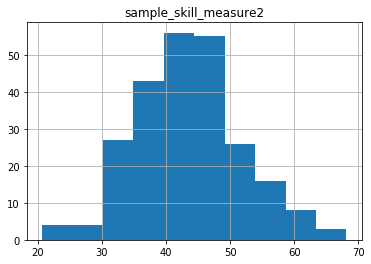

In [10]:
df_skill_measure1_below_50.hist(column='sample_skill_measure1')
df_skill_measure1_below_50.hist(column='sample_skill_measure2')

Observe que o histograma <em>sample_skill_measure1</em> da nossa <strong><font color=gray>amostra</font></strong> de jogadores se assemelha à metade esquerda da curva normal, o que já era esperado uma vez que selecionamos apenas os jogadores da metade inferior ($\text{skill_measure1} < 50$) da medição do primeiro semestre da nossa <strong><font color=orange>população</font></strong>.

Já, o histograma <em>sample_skill_measure2</em> não parece tão claramente cortado ao meio. Por que não? A habilidade real (<em>sample_skill</em>) destes jogadores permanece a mesma tanto no primeiro quanto no segundo semestre. Logo, isto deve ter relação com a componente da sorte, que não é a mesma entre o primeiro e segundo semestres (<em>sample_luck1</em> e <em>sample_luck2</em>).

Obviamente, como todos os jogadores possuem a mesma habilidade (<em>sample_skill</em>) nas duas medições e, como os jogadores parecem, em média, ter um desempenho um pouco melhor na medição do segundo semestre (<em>sample_skill_measure2</em>) do que na do primeiro (<em>sample_skill_measure1</em>), devemos esperar mais componentes de sorte negativas na medição <em>sample_skill_measure1</em> do que na medição <em>sample_skill_measure2</em>. Vamos verificar se isto é verdade.

In [11]:
import numpy as np

def count_neg_zeros_pos(array):
    is_negative = array < 0.0
    is_positive = array > 0.0
    negatives = np.sum(is_negative)
    positives = np.sum(is_positive)
    zeros = pop_size - negatives - positives
    return negatives, zeros, positives

In [12]:
sl1 = count_neg_zeros_pos(df_skill_measure1_below_50['sample_luck1'])
sl2 = count_neg_zeros_pos(df_skill_measure1_below_50['sample_luck2'])

table = pd.DataFrame(
    {'sample_luck1': [sl1[0],sl1[1],sl1[2]], 'sample_luck2': [sl2[0],sl2[1],sl2[2]]},
    index = ['negatives', 'zeros', 'positives']
)
table

,sample_luck1,sample_luck2
negatives,165,123
zeros,258,258
positives,77,119


Deveria haver mais componentes de sorte negativos no semestre 1 e mais positivos para o semestre 2. Correto?

Então, vamos refletir sobre o que fizemos até o momento.
- Simulamos dois experimentos (um no semestre 1 e outro no semestre 2) que medem a performance dos jogadores. Existem imperfeições (ruídos) nestas medições (ou seja, elas possuem uma componente aleatória de sorte).
- Selecionamos uma <strong><font color=gray>amostra</font></strong> <strong>assimétrica</strong> com base no desempenho observado em um dos experimentos (selecionamos jogadores com $\text{skill_measure1} < 50$). Mesmo que nada tenha sido feito com este grupo de jogadores (nenhuma política nova de treino), quando realizamos um novo experimento de medição no segundo semestre, descobrimos que os jogadores apresentaram uma pequena melhora no desempenho.

Se você fosse o treinador deste grupo de jogadores e tivesse sugerido a necessidade de uma nova metodologia de treinamento com base nos resultados observados no primeiro semestre (<em>sample_skill_measure1</em>), então, caso nada tivesse sido feito por você, as pessoas poderiam começar a questionar a sua sugestão de uma nova metodologia de treinamento, uma vez que ocorreu um melhora no segundo semestre sem a adoção de nenhuma nova política de treinamento. Digamos que você decidiu mostrar para estas pessoas que o ganho aparente deste grupo de jogadores não seja de fato um ganho real de desempenho. Então, você decide que analisará a mudança de desempenho entre o primeiro e segundo semestres para os jogadores que tiveram um desempenho acima da média no primeiro semestre ($\text{skill_measure1} > 50$).

In [13]:
is_skill_measure1_above_50 = df['skill_measure1'] > 50
df_skill_measure1_above_50 = filter_df(is_skill_measure1_above_50, df)
df_skill_measure1_above_50.head()

,sample_skill,sample_luck1,sample_luck2,sample_skill_measure1,sample_skill_measure2
0,61.984872,0.472335,-0.616716,62.457207,61.368156
3,48.264599,3.002146,2.044334,51.266746,50.308933
4,57.324535,-0.320804,-7.076440,57.003731,50.248095
5,47.740825,3.269675,-0.318569,51.010500,47.422256
6,54.108748,1.308204,-2.016945,55.416952,52.091804


Desta vez, geramos uma <strong><font color=gray>amostra</font></strong> (a partir da nossa <strong><font color=orange>população</font></strong>) que compreende apenas jogadores tais que $\text{skill_measure1} > 50$. Novamente, trata-se de uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong>.

Se compararmos o desempenho somente destes jogadores da nossa <strong><font color=gray>amostra</font></strong> entre o primeiro e segundo semestres (<em>sample_skill_measure1</em> e <em>sample_skill_measure2</em>), teremos:

In [14]:
df_skill_measure1_above_50[['sample_skill_measure1', 'sample_skill_measure2']].describe()

,sample_skill_measure1,sample_skill_measure2
count,258.000000,258.000000
mean,58.830952,56.525883
std,6.838843,9.167280
min,50.004843,37.165590
25%,53.812881,50.171812
50%,57.234659,55.403893
75%,63.213246,62.069192
max,84.196497,88.173744


O que aconteceu desta vez? Parece que o grupo de jogadores acima da média no primeiro semestre apresentou uma piora no desempenho do primeiro para o segundo semestre. Agora, aquelas pessoas que criticaram a sua sugestão de um novo programa de treinamento estão realmente convencidos (ou deveríamos dizer, confusos?). Elas argumentaram que os jogadores de baixo desempenho no primeiro semestre melhoraram mesmo sem qualquer programa especial de treinamento, mas os jogadores de alto desempenho pioraram. Talvez as pessoas digam que você deveria aplicar o seu programa especial de treinamento nos jogadores que apresentaram alto desempenho no primeiro semestre, para evitar mais pioras futuras de desempenho.

O que está acontecendo aqui? O que você testemunhou aqui novamente foi o fenômeno estatístico chamado <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>). Isto ocorre em parte porque as medições realizadas são imperfeitas (possuem ruidos).

No nosso exemplo, os experimentos de medição revelam parcialmente a <font color=magenta>habilidade verdadeira</font> dos jogadores, pois eles também capturam os <font color=magenta>ruídos</font> (no nosso exemplo, a componente de <font color=magenta>sorte</font>). Para qualquer jogador, a componente da sorte pode funcionar a favor ou contra, o jogador pode ter um dia bom (ou seja, sorte positiva) ou um dia ruim (sorte negativa). Se teve um dia ruim, então, a medição resultante do experimento será inferior à sua habilidade verdadeira, ao passo que, se teve um dia bom, a medição resultante do experimento estará acima da sua habilidade real.

Quando selecionamos um grupo de jogadores com desempenho abaixo da média da <strong><font color=orange>população</font></strong> de $500$ jogadores, foram escolhidos muitos jogadores que realmente apresentavam habilidade abaixo da média, mas também foram selecionados jogadores cujo resultado da medição de habilidade foi abaixo da média porque estavam num dia ruim (ou seja, a componente da sorte negativa). Então, quando foi realizado um segundo experimento de medição com estes mesmos jogadores, a habilidade real dos mesmos permaneceu a mesma, mas a chance de terem um dia tão ruim quanto tiveram no primeiro experimento é bem menor. Logo, é esperado que no segundo experimento (<em>sample_skill_measure2</em>) este grupo de jogadores apresente uma média melhor do que a da medição do primeiro experimento.

Também é possível que, ao repetirmos estas mesmas simulações de antes, eventualmente, os resultados não ocorram como descrevi aqui. Isto pode acontecer porque não selecionamos um grupo de jogadores com desempenho tão extremo. Vamos repetir as simulações com um grupo de jogadores com desempenho bem mais extremo do que $\text{skill_measure1} < 50$.

In [15]:
is_skill_measure1_below_40 = df['skill_measure1'] < 40
df_skill_measure1_below_40 = filter_df(is_skill_measure1_below_40, df)
df_skill_measure1_below_40.head()

,sample_skill,sample_luck1,sample_luck2,sample_skill_measure1,sample_skill_measure2
7,40.961612,-8.160972,-5.013607,32.800640,35.948005
14,37.995205,1.975834,-0.894044,39.971039,37.101160
16,39.810596,-4.614189,0.685386,35.196408,40.495982
17,42.213265,-6.550948,1.759866,35.662317,43.973131
23,43.804145,-7.811903,-4.773071,35.992242,39.031074


Desta vez, geramos uma <strong><font color=gray>amostra</font></strong> (a partir da nossa <strong><font color=orange>população</font></strong>) que compreende apenas jogadores tais que $\text{skill_measure1} < 40$. Além de ser uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong>, trata-se de uma amostra bem mais extrema do que a anterior.

Vejamos as distribuições dos dois experimentos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BF8D27A08>]],
      dtype=object)

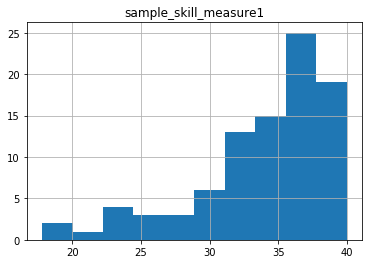

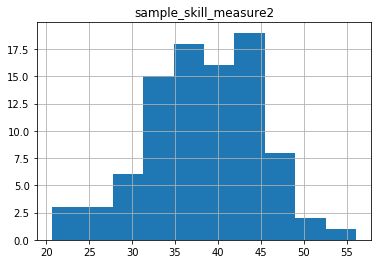

In [16]:
df_skill_measure1_below_40.hist(column='sample_skill_measure1')
df_skill_measure1_below_40.hist(column='sample_skill_measure2')

Agora, o histograma <em>sample_skill_measure1</em> da nossa <strong><font color=gray>amostra</font></strong> de jogadores parece ter sido claramente cortado, já, o histograma <em>sample_skill_measure2</em> não. E quanto às médias dos dois experimentos?

In [17]:
df_skill_measure1_below_40[['sample_skill_measure1', 'sample_skill_measure2']].describe()

,sample_skill_measure1,sample_skill_measure2
count,91.000000,91.000000
mean,33.843274,38.250323
std,5.062275,6.555654
min,17.791676,20.639844
25%,31.619031,33.523893
50%,35.407776,38.701465
75%,37.179546,43.087919
max,39.971039,56.115881


Analisando as médias, é possível observar que esta <strong><font color=gray>amostra</font></strong> de jogadores apresentou um desempenho muito superior no segundo experimento se comparado ao primeiro. Os efeitos da <strong>regressão à média</strong> (<strong><em>regression to the mean</em></strong>) aqui estão mais evidentes.

## Explicação da regressão à média através de uma ilustração

![regression-to-the-mean](figures/regression_to_the_mean2.jpg)

## O que precisamos saber sobre regressão à média

<strong>Trata-se de um fenômeno estatístico</strong>

>A regressão à média ocorre quando uma amostragem é realizada de forma assimétrica em relação à população. Se você fizer uma amostragem aleatória da população, observará (sujeito a erro aleatório) que a população e a sua amostra possuem a mesma média na primeira medição. Então, como a amostra já está na média da população na primeira medição, é impossível que esta média volte à média da população.

<strong>É um fenômeno de grupo</strong>

>Não é possível determinar de que maneira a medição de uma característica de um indivíduo irá se mover com base na regressão à média. Embora a média do grupo se mova em direção à média da população, é provável que a medição de alguns indivíduos do grupo mova na direção oposta.

<strong>É um fenômeno relativo</strong>

>Isto não tem qualquer relação com as tendências maturacionais gerais. Pode acontecer de todos na população ganharem 20 pontos (em média) entre a medição 1 e a medição 2. Mas mesmo neste caso, a regressão à média ainda pode operar, ou seja, as pessoas com baixa pontuação, em média, ganhando mais pontos do que o ganho populacional de 20 pontos (e, portanto, sua média estará mais próxima da média da população).

<strong>A regressão à média pode ocorrer para cima ou para baixo</strong>

>Se uma amostra compreender pontuadores abaixo da média da população, então, o efeito da regressão à média ocasionará a percepção de que a pontuação dos mesmos melhorou na segunda medição. Porém, se uma amostra for composta por pontuadores acima da média da população, então, a percepção contrária ocorrerá.

<strong>Quanto mais extremo o grupo amostral, maior a regressão à média</strong>

>Se uma amostra diferir da população apenas um pouco na primeira medida, então, não haverá muito espaço para regressão à média, pois, a média da amostra já estará próxima da média da população. Já, se uma amostra for muito extrema em relação à população, então, a média da amostra estará mais distante da média da população e haverá mais espaço para regressão à média.

<strong>Quanto menos correlacionadas as duas medições, maior o efeito da regressão à média</strong>

>Outro fator que afeta o tamanho do efeito da regressão à média é a correlação entre as duas medições. Se as duas medições estiverem perfeitamente correlacionadas, então, não haverá regressão à média. No entanto, é improvável que isto ocorra na prática. Sabe-se que não existe uma medição perfeita, ou seja, assume-se que toda medida tem algum erro aleatório (algum ruído).

## Resumo

<strong>R1.</strong> <strong>Regressão à média</strong> (<strong><em>regression to the mean</em></strong>) <mark>é um fenômeno estatístico</mark> que ocorre sempre que:
- você trabalha com uma <strong><font color=gray>amostra</font></strong> <strong>não aleatória</strong> extraída da <strong><font color=orange>população</font></strong>
- e duas variáveis <strong>imperfeitamente correlacionadas</strong> (correlação diferente de $1$ ou diferente de $-1$) são medidas.

<strong>R2.</strong> Quanto menos correlacionadas as duas variáveis, maior o efeito da regressão para a média. Além disso, quanto mais extremo for o valor da média da <strong><font color=gray>amostra</font></strong> não aleatória (quando comparada com a média da <strong><font color=orange>população</font></strong>), mais espaço haverá para regredir à média.

*Referências*:
- http://people.duke.edu/~rnau/regintro.htm
- https://socialresearchmethods.net/kb/regression-to-the-mean/
- https://billtrochim.net/simul/reg_c.htm

<!--NAVIGATION-->
< [Conteúdo](Index.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/1001.Regressao-a-Media.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>